Data Cleaning and Machine Learning Project

In [205]:
# importing the necessary libraries
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make this notebook's output identical/stable across runs
np.random.seed(7)

# set up numpy to display precision upto 3 decimal places and suppresses the use of scientific notation for small numbers
#np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

pd.set_option('display.max_columns', None) # show all columns in a Pandas DataFrame
pd.set_option('display.max_rows', None)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
plt.rcParams['image.cmap'] = "gray"

# Where to save the data and figures
PROJECT_ROOT_DIR = "/Users/harshitchandrol/Documents/SEM 3/Data Quality/Project/"
IMAGES_DIR = "/Users/harshitchandrol/Documents/SEM 3/Data Quality/Project/images/"
DATA_DIR = "/Users/harshitchandrol/Documents/SEM 3/Data Quality/Project/Data"
MODELS_DIR = "/Users/harshitchandrol/Documents/SEM 3/Data Quality/Project/models"
SUB_DIR = "/Users/harshitchandrol/Documents/SEM 3/Data Quality/Project/model-eval" # NOTE: update this for each project
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, IMAGES_DIR, SUB_DIR)
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, DATA_DIR, SUB_DIR)
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, MODELS_DIR, SUB_DIR)
os.makedirs(IMAGES_PATH, exist_ok=True)
os.makedirs(DATA_PATH, exist_ok=True)
os.makedirs(MODELS_PATH, exist_ok=True)

# Function for saving figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Function for saving data downloaded from a URL
from six.moves import urllib
def save_data(file_url, file_name):
    path = os.path.join(DATA_PATH, file_name)
    print("Saving data file", file_name)
    urllib.request.urlretrieve(file_url, path)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
#warnings.filterwarnings(action='ignore', category=DeprecationWarning, module='sklearn')
#warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

In [206]:
# importing the two data set i.e the matches & Shooting 
matches_data = pd.read_excel('/Users/harshitchandrol/Documents/SEM 3/Data Quality/Project/matches/Matches_data/Match_final.xlsx')
shooting_data = pd.read_excel('/Users/harshitchandrol/Documents/SEM 3/Data Quality/Project/matches/Shooting_data/Shooting_final.xlsx')

In [207]:
#checking the first five rows of both datasets
matches_data.head()

Date           Time            Comp        Round  Day Venue Result  \
0 2022-08-06  17:30 (12:30)  Premier League  Matchweek 1  Sat  Home      L   
1 2022-08-07  14:00 (09:00)  Premier League  Matchweek 1  Sun  Home      L   
2 2021-08-14  15:00 (10:00)  Premier League  Matchweek 1  Sat  Home      W   
3 2020-09-12  12:30 (07:30)  Premier League  Matchweek 1  Sat  Away      W   
4 2022-08-06  15:00 (10:00)  Premier League  Matchweek 1  Sat  Away      L   

    GF   GA     Opponent   xG  xGA  Poss  Attendance  \
0  0.0  1.0      Chelsea  0.7  1.5  38.0     39254.0   
1  1.0  2.0     Brighton  1.4  1.5  62.0     73711.0   
2  3.0  2.0  Aston Villa  1.2  1.2  38.0     20051.0   
3  3.0  0.0       Fulham  1.9  0.1  54.0         NaN   
4  0.0  2.0  Bournemouth  0.7  0.6  65.0     11013.0   

                     Captain            Formation         Referee  \
0            Jordan Pickford  2001-05-04 00:00:00    Craig Pawson   
1              Harry Maguire  2003-04-03 00:00:00    Paul Tierney   
2              Tom Cleverley              4-1-4-1       Mike Dean   
3  Pierre-Emerick Aubameyang  2003-03-04 00:00:00  Chris Kavanagh   
4                John McGinn  2003-04-03 00:00:00    Peter Bankes   

   Match Report Notes               team  
0  Match Report   NaN            Everton  
1  Match Report   NaN  Manchester United  
2  Match Report   NaN            Watford  
3  Match Report   NaN            Arsenal  
4  Match Report   NaN        Aston Villa

In [208]:
shooting_data.head()

Date           Time            Comp         Round  Day Venue Result  \
0 2023-03-19  14:00 (10:00)  Premier League  Matchweek 28  Sun  Home      W   
1 2023-03-19  14:00 (10:00)  Premier League  Matchweek 28  Sun  Away      L   
2 2023-03-18  15:00 (11:00)  Premier League  Matchweek 28  Sat  Home      D   
3 2023-03-18  15:00 (11:00)  Premier League  Matchweek 28  Sat  Away      D   
4 2023-03-18  17:30 (13:30)  Premier League  Matchweek 28  Sat  Away      D   

   GF  GA        Opponent  Gls  Sh  SoT  SoT%  G/Sh  G/SoT  Dist  FK  PK  \
0   4   1  Crystal Palace    4  15    5  33.3  0.27   0.80  16.4   0   0   
1   1   4         Arsenal    1   9    5  55.6  0.11   0.20  14.6   1   0   
2   1   1  Leicester City    1  11    2  18.2  0.09   0.50  17.5   0   0   
3   1   1       Brentford    1  14    1   7.1  0.07   1.00  16.8   0   0   
4   2   2         Chelsea    2  12    3  25.0  0.17   0.67  18.9   1   0   

   PKatt   xG  npxG  npxG/Sh  G-xG  np:G-xG  Match Report  
0      0  1.6   1.6     0.10   2.4      2.4  Match Report  
1      0  0.8   0.8     0.09   0.2      0.2  Match Report  
2      0  0.6   0.6     0.06   0.4      0.4  Match Report  
3      0  1.3   1.3     0.10  -0.3     -0.3  Match Report  
4      0  1.2   1.2     0.11   0.8      0.8  Match Report

In [209]:
#checking the shape of the data sets
matches_data.shape

(2280, 20)

In [210]:
shooting_data.shape

(2060, 26)

In [211]:
# let us see the measures if centrality of the datasets
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2280 non-null   datetime64[ns]
 1   Time          2280 non-null   object        
 2   Comp          2280 non-null   object        
 3   Round         2262 non-null   object        
 4   Day           2280 non-null   object        
 5   Venue         2280 non-null   object        
 6   Result        2060 non-null   object        
 7   GF            2033 non-null   float64       
 8   GA            2020 non-null   float64       
 9   Opponent      2280 non-null   object        
 10  xG            2060 non-null   float64       
 11  xGA           2054 non-null   float64       
 12  Poss          2060 non-null   float64       
 13  Attendance    1364 non-null   float64       
 14  Captain       2060 non-null   object        
 15  Formation     2060 non-null   object  

In [212]:
shooting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2060 non-null   datetime64[ns]
 1   Time          2060 non-null   object        
 2   Comp          2060 non-null   object        
 3   Round         2060 non-null   object        
 4   Day           2060 non-null   object        
 5   Venue         2060 non-null   object        
 6   Result        2060 non-null   object        
 7   GF            2060 non-null   int64         
 8   GA            2060 non-null   int64         
 9   Opponent      2060 non-null   object        
 10  Gls           2060 non-null   int64         
 11  Sh            2060 non-null   int64         
 12  SoT           2060 non-null   int64         
 13  SoT%          2059 non-null   float64       
 14  G/Sh          2059 non-null   float64       
 15  G/SoT         1994 non-null   float64 

In [213]:
matches_data.describe(include='all')

/var/folders/lq/d88dgpfd7x5dywf41x7l02dw0000gn/T/ipykernel_72511/1625748217.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  matches_data.describe(include='all')


Date           Time            Comp        Round   Day  \
count                  2280           2280            2280         2262  2280   
unique                  367             30               1           38     7   
top     2023-05-13 00:00:00  15:00 (10:00)  Premier League  Matchweek 1   Sat   
freq                     20            596            2280           60   988   
first   2020-09-12 00:00:00            NaN             NaN          NaN   NaN   
last    2023-05-28 00:00:00            NaN             NaN          NaN   NaN   
mean                    NaN            NaN             NaN          NaN   NaN   
std                     NaN            NaN             NaN          NaN   NaN   
min                     NaN            NaN             NaN          NaN   NaN   
25%                     NaN            NaN             NaN          NaN   NaN   
50%                     NaN            NaN             NaN          NaN   NaN   
75%                     NaN            NaN             NaN          NaN   NaN   
max                     NaN            NaN             NaN          NaN   NaN   

       Venue Result           GF           GA Opponent           xG  \
count   2280   2060  2033.000000  2020.000000     2280  2060.000000   
unique     2      3          NaN          NaN       25          NaN   
top     Home      L          NaN          NaN  Chelsea          NaN   
freq    1140    794          NaN          NaN      114          NaN   
first    NaN    NaN          NaN          NaN      NaN          NaN   
last     NaN    NaN          NaN          NaN      NaN          NaN   
mean     NaN    NaN     1.375307     1.372277      NaN     1.326505   
std      NaN    NaN     1.294796     1.292346      NaN     0.779937   
min      NaN    NaN     0.000000     0.000000      NaN     0.000000   
25%      NaN    NaN     0.000000     0.000000      NaN     0.700000   
50%      NaN    NaN     1.000000     1.000000      NaN     1.200000   
75%      NaN    NaN     2.000000     2.000000      NaN     1.800000   
max      NaN    NaN     9.000000     9.000000      NaN     5.900000   

                xGA         Poss    Attendance            Captain Formation  \
count   2054.000000  2060.000000   1364.000000               2060      2060   
unique          NaN          NaN           NaN                117        21   
top             NaN          NaN           NaN  James Ward-Prowse   4-2-3-1   
freq            NaN          NaN           NaN                102       546   
first           NaN          NaN           NaN                NaN       NaN   
last            NaN          NaN           NaN                NaN       NaN   
mean       1.328043    50.000971  38149.000000                NaN       NaN   
std        0.780462    12.417733  17080.214799                NaN       NaN   
min        0.000000    18.000000   2000.000000                NaN       NaN   
25%        0.700000    40.000000  26765.000000                NaN       NaN   
50%        1.200000    50.000000  36298.500000                NaN       NaN   
75%        1.800000    60.000000  53001.000000                NaN       NaN   
max        5.900000    82.000000  75546.000000                NaN       NaN   

               Referee  Match Report            Notes     team  
count             2060          2274                6     2242  
unique              27             2                1       27  
top     Anthony Taylor  Match Report  Match Postponed  Everton  
freq               152          2060                6      114  
first              NaN           NaN              NaN      NaN  
last               NaN           NaN              NaN      NaN  
mean               NaN           NaN              NaN      NaN  
std                NaN           NaN              NaN      NaN  
min                NaN           NaN              NaN      NaN  
25%                NaN           NaN              NaN      NaN  
50%                NaN           NaN              NaN      NaN  
75%   

In [214]:
shooting_data.describe()

GF           GA          Gls           Sh          SoT  \
count  2060.000000  2060.000000  2060.000000  2060.000000  2060.000000   
mean      1.374272     1.374272     1.323301    12.313107     4.106796   
std       1.294520     1.294520     1.264197     5.356229     2.391350   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     8.000000     2.000000   
50%       1.000000     1.000000     1.000000    12.000000     4.000000   
75%       2.000000     2.000000     2.000000    16.000000     6.000000   
max       9.000000     9.000000     8.000000    31.000000    15.000000   

              SoT%         G/Sh        G/SoT         Dist           FK  \
count  2059.000000  2059.000000  1994.000000  2059.000000  2060.000000   
mean     33.900486     0.101622     0.289288    17.497523     0.448544   
std      16.055097     0.107373     0.267114     3.046827     0.657288   
min       0.000000     0.000000     0.000000     5.300000     0.000000   
25%      23.100000     0.000000     0.000000    15.550000     0.000000   
50%      33.300000     0.080000     0.250000    17.400000     0.000000   
75%      43.800000     0.150000     0.500000    19.300000     1.000000   
max     100.000000     1.000000     1.000000    35.000000     4.000000   

                PK        PKatt           xG         npxG      npxG/Sh  \
count  2060.000000  2060.000000  2060.000000  2060.000000  2059.000000   
mean      0.114563     0.142233     1.326505     1.216796     0.101073   
std       0.339244     0.374857     0.779937     0.733524     0.047119   
min       0.000000     0.000000     0.000000     0.000000     0.020000   
25%       0.000000     0.000000     0.700000     0.700000     0.070000   
50%       0.000000     0.000000     1.200000     1.100000     0.090000   
75%       0.000000     0.000000     1.800000     1.600000     0.120000   
max       3.000000     3.000000     5.900000     4.400000     0.440000   

              G-xG      np:G-xG  
count  2060.000000  2060.000000  
mean     -0.003204    -0.008058  
std       0.991875     0.979277  
min      -2.900000    -2.900000  
25%      -0.700000    -0.700000  
50%      -0.100000    -0.100000  
75%       0.600000     0.600000  
max       4.700000     4.700000

In [215]:
# checking the null values in matches dataset
matches_data.isnull().sum()

Date               0
Time               0
Comp               0
Round             18
Day                0
Venue              0
Result           220
GF               247
GA               260
Opponent           0
xG               220
xGA              226
Poss             220
Attendance       916
Captain          220
Formation        220
Referee          220
Match Report       6
Notes           2274
team              38
dtype: int64

In [216]:
# checking the null values in shooting dataset
shooting_data.isnull().sum()

Date             0
Time             0
Comp             0
Round            0
Day              0
Venue            0
Result           0
GF               0
GA               0
Opponent         0
Gls              0
Sh               0
SoT              0
SoT%             1
G/Sh             1
G/SoT           66
Dist             1
FK               0
PK               0
PKatt            0
xG               0
npxG             0
npxG/Sh          1
G-xG             0
np:G-xG          0
Match Report     0
dtype: int64

In [217]:
# merging matches and shooting dataset
merge_col = ['Date','Time','Venue','Opponent']
merged_data= matches_data.merge(shooting_data,  how='inner', left_on=merge_col, right_on = merge_col)
merged_data.head()

Date           Time          Comp_x      Round_x Day_x Venue Result_x  \
0 2022-08-06  17:30 (12:30)  Premier League  Matchweek 1   Sat  Home        L   
1 2022-08-07  14:00 (09:00)  Premier League  Matchweek 1   Sun  Home        L   
2 2021-08-14  15:00 (10:00)  Premier League  Matchweek 1   Sat  Home        W   
3 2020-09-12  12:30 (07:30)  Premier League  Matchweek 1   Sat  Away        W   
4 2022-08-06  15:00 (10:00)  Premier League  Matchweek 1   Sat  Away        L   

   GF_x  GA_x     Opponent  xG_x  xGA  Poss  Attendance  \
0   0.0   1.0      Chelsea   0.7  1.5  38.0     39254.0   
1   1.0   2.0     Brighton   1.4  1.5  62.0     73711.0   
2   3.0   2.0  Aston Villa   1.2  1.2  38.0     20051.0   
3   3.0   0.0       Fulham   1.9  0.1  54.0         NaN   
4   0.0   2.0  Bournemouth   0.7  0.6  65.0     11013.0   

                     Captain            Formation         Referee  \
0            Jordan Pickford  2001-05-04 00:00:00    Craig Pawson   
1              Harry Maguire  2003-04-03 00:00:00    Paul Tierney   
2              Tom Cleverley              4-1-4-1       Mike Dean   
3  Pierre-Emerick Aubameyang  2003-03-04 00:00:00  Chris Kavanagh   
4                John McGinn  2003-04-03 00:00:00    Peter Bankes   

  Match Report_x Notes               team          Comp_y      Round_y Day_y  \
0   Match Report   NaN            Everton  Premier League  Matchweek 1   Sat   
1   Match Report   NaN  Manchester United  Premier League  Matchweek 1   Sun   
2   Match Report   NaN            Watford  Premier League  Matchweek 1   Sat   
3   Match Report   NaN            Arsenal  Premier League  Matchweek 1   Sat   
4   Match Report   NaN        Aston Villa  Premier League  Matchweek 1   Sat   

  Result_y  GF_y  GA_y  Gls  Sh  SoT  SoT%  G/Sh  G/SoT  Dist  FK  PK  PKatt  \
0        L     0     1    0   8    3  37.5  0.00   0.00  13.5   0   0      0   
1        L     1     2    0  17    5  29.4  0.00   0.00  15.5   0   0      0   
2        W     3     2    3  13    7  53.8  0.23   0.43  17.9   0   0      0   
3        W     3     0    3  13    5  38.5  0.23   0.60  14.1   2   0      0   
4        L     0     2    0  15    2  13.3  0.00   0.00  24.6   0   0      0   

   xG_y  npxG  npxG/Sh  G-xG  np:G-xG Match Report_y  
0   0.7   0.7     0.09  -0.7     -0.7   Match Report  
1   1.4   1.4     0.08  -1.4     -1.4   Match Report  
2   1.2   1.2     0.09   1.8      1.8   Match Report  
3   1.9   1.9     0.20   1.1      1.1   Match Report  
4   0.7   0.7     0.04  -0.7     -0.7   Match Report

In [218]:
merged_data.shape # as we have 3 null values for Opponent in matches data, while merging we removed those data

(2060, 42)

In [219]:
merged_data.isnull().sum()

Date                 0
Time                 0
Comp_x               0
Round_x             17
Day_x                0
Venue                0
Result_x             0
GF_x                27
GA_x                40
Opponent             0
xG_x                 0
xGA                  6
Poss                 0
Attendance         696
Captain              0
Formation            0
Referee              0
Match Report_x       0
Notes             2060
team                28
Comp_y               0
Round_y              0
Day_y                0
Result_y             0
GF_y                 0
GA_y                 0
Gls                  0
Sh                   0
SoT                  0
SoT%                 1
G/Sh                 1
G/SoT               66
Dist                 1
FK                   0
PK                   0
PKatt                0
xG_y                 0
npxG                 0
npxG/Sh              1
G-xG                 0
np:G-xG              0
Match Report_y       0
dtype: int64

In [220]:
# there are 17 missing values for ROund_x variable, 
#instead of removing them we can get those values from the ROund_y column refering to shooting_data
merged_data['Round_x'] = merged_data['Round_x'].mask(merged_data['Round_x'].isna(), merged_data['Round_y'])
# similar for GF_X,GA_x, hence
merged_data['GF_x'] = merged_data['GF_x'].mask(merged_data['GF_x'].isna(), merged_data['GF_y'])
merged_data['GA_x'] = merged_data['GA_x'].mask(merged_data['GA_x'].isna(), merged_data['GA_y'])

In [221]:
merged_data.isnull().sum()

Date                 0
Time                 0
Comp_x               0
Round_x              0
Day_x                0
Venue                0
Result_x             0
GF_x                 0
GA_x                 0
Opponent             0
xG_x                 0
xGA                  6
Poss                 0
Attendance         696
Captain              0
Formation            0
Referee              0
Match Report_x       0
Notes             2060
team                28
Comp_y               0
Round_y              0
Day_y                0
Result_y             0
GF_y                 0
GA_y                 0
Gls                  0
Sh                   0
SoT                  0
SoT%                 1
G/Sh                 1
G/SoT               66
Dist                 1
FK                   0
PK                   0
PKatt                0
xG_y                 0
npxG                 0
npxG/Sh              1
G-xG                 0
np:G-xG              0
Match Report_y       0
dtype: int64

In [222]:
# removing the common columns post merging the dataset.
dup_col = ['xG_x','xGA','Attendance','Captain','Notes','Comp_y','Round_y','Day_y','Result_y','GF_y','GA_y','xG_y','npxG','npxG/Sh','G-xG','np:G-xG','Match Report_y']
merged_data = merged_data.drop(dup_col,axis=1)

In [227]:
merged_data.isnull().sum()

Date               0
Time               0
Comp_x             0
Round_x            0
Day_x              0
Venue              0
Result_x           0
GF_x               0
GA_x               0
Opponent           0
Poss               0
Formation          0
Referee            0
Match Report_x     0
team              28
Gls                0
Sh                 0
SoT                0
SoT%               1
G/Sh               1
G/SoT              0
Dist               0
FK                 0
PK                 0
PKatt              0
dtype: int64

In [224]:
merged_data['G/SoT'].fillna(value=merged_data['G/SoT'].mean(), inplace=True)

In [225]:
merged_data['Dist'].fillna(value=merged_data['Dist'].mean(), inplace=True)

In [226]:
merged_data[merged_data.isnull().any(axis=1)]

Date           Time          Comp_x       Round_x Day_x Venue  \
45   2022-08-05  20:00 (15:00)  Premier League   Matchweek 1   Fri  Away   
105  2022-10-09  16:30 (11:30)  Premier League  Matchweek 10   Sun  Home   
165  2022-10-16  14:00 (09:00)  Premier League  Matchweek 11   Sun  Away   
225  2023-02-15  19:30 (14:30)  Premier League  Matchweek 12   Wed  Home   
285  2022-10-23  14:00 (09:00)  Premier League  Matchweek 13   Sun  Away   
345  2022-10-30  14:00 (10:00)  Premier League  Matchweek 14   Sun  Home   
405  2022-11-06  12:00 (07:00)  Premier League  Matchweek 15   Sun  Away   
465  2022-11-12  19:45 (14:45)  Premier League  Matchweek 16   Sat  Away   
525  2022-12-26  20:00 (15:00)  Premier League  Matchweek 17   Mon  Home   
585  2022-12-31  17:30 (12:30)  Premier League  Matchweek 18   Sat  Away   
645  2023-01-03  19:45 (14:45)  Premier League  Matchweek 19   Tue  Home   
705  2022-08-13  15:00 (10:00)  Premier League   Matchweek 2   Sat  Home   
765  2023-01-15  16:30 (11:30)  Premier League  Matchweek 20   Sun  Away   
825  2023-01-22  16:30 (11:30)  Premier League  Matchweek 21   Sun  Home   
885  2023-02-04  12:30 (07:30)  Premier League  Matchweek 22   Sat  Away   
945  2023-02-11  15:00 (10:00)  Premier League  Matchweek 23   Sat  Home   
1005 2023-02-18  12:30 (07:30)  Premier League  Matchweek 24   Sat  Away   
1061 2023-02-25  15:00 (10:00)  Premier League  Matchweek 25   Sat  Away   
1121 2023-03-04  15:00 (10:00)  Premier League  Matchweek 26   Sat  Home   
1181 2023-03-12  14:00 (10:00)  Premier League  Matchweek 27   Sun  Away   
1235 2023-03-19  14:00 (10:00)  Premier League  Matchweek 28   Sun  Home   
1335 2022-08-20  17:30 (12:30)  Premier League   Matchweek 3   Sat  Away   
1755 2022-08-27  17:30 (12:30)  Premier League   Matchweek 4   Sat  Home   
1804 2020-10-18  14:00 (09:00)  Premier League   Matchweek 5   Sun  Home   
1815 2022-08-31  19:30 (14:30)  Premier League   Matchweek 5   Wed  Home   
1875 2022-09-04  16:30 (11:30)  Premier League   Matchweek 6   Sun  Away   
1929 2023-03-01  19:45 (14:45)  Premier League   Matchweek 7   Wed  Home   
1985 2022-09-18  12:00 (07:00)  Premier League   Matchweek 8   Sun  Away   
2045 2022-10-01  12:30 (07:30)  Premier League   Matchweek 9   Sat  Home   

     Result_x  GF_x  GA_x         Opponent  Poss            Formation  \
45          W   2.0   0.0   Crystal Palace  44.0  2003-04-03 00:00:00   
105         W   3.0   2.0        Liverpool  43.0  2003-04-03 00:00:00   
165         W   1.0   0.0     Leeds United  53.0  2003-04-03 00:00:00   
225         L   1.0   3.0  Manchester City  63.0  2003-04-03 00:00:00   
285         D   1.0   1.0      Southampton  59.0  2003-04-03 00:00:00   
345         W   5.0   0.0  Nott'ham Forest  69.0  2003-04-03 00:00:00   
405         W   1.0   0.0          Chelsea  55.0  2003-04-03 00:00:00   
465         W   2.0   0.0           Wolves  62.0  2003-04-03 00:00:00   
525         W   3.0   1.0         West Ham  66.0  2003-04-03 00:00:00   
585         W   4.0   2.0         Brighton  32.0  2003-04-03 00:00:00   
645         D   0.0   0.0    Newcastle Utd  66.0  2003-04-03 00:00:00   
705         W   4.0   2.0   Leicester City  50.0  2003-04-03 00:00:00   
765         W   2.0   0.0        Tottenham  49.0  2003-04-03 00:00:00   
825         W   3.0   2.0   Manchester Utd  57.0  2003-04-03 00:00:00   
885         L   0.0   1.0          Everton  70.0  2003-04-03 00:00:00   
945         D   1.0   1.0        Brentford  69.0  2003-04-03 00:00:00   
1005        W   4.0   2.0      Aston Villa  67.0  2003-04-03 00:00:00   
1061        W   1.0   0.0   Leicester City  65.0  2003-04-03 00:00:00   
1121        W   3.0   2.0      Bournemouth  79.0  2003-04-03 00:00:00   
1181        W   3.0   0.0           Fulham  55.0  2003-04-03 00:00:00   
1235        W   4.0   1.0   Crystal Palace  62.0  2003-04-03 00:00:00   
1335        W   3.0   0.0      Bournemouth  57.0  2003-04-03 00:00:00   
1755        W   2.0   1.0           Fulham  71.0  2

In [228]:
# dropping the missing value rows. removing missing values rows if the counts less than 5% of the dataset is OK. 
merged_data.dropna(axis=0,inplace=True)

<AxesSubplot:>

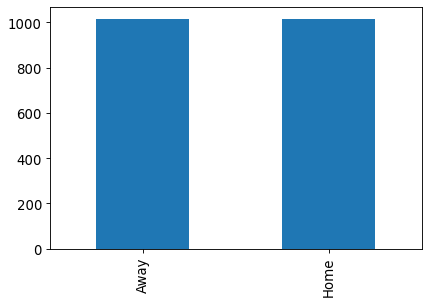

In [229]:
merged_data['Venue'].value_counts().plot(kind='bar')

<AxesSubplot:>

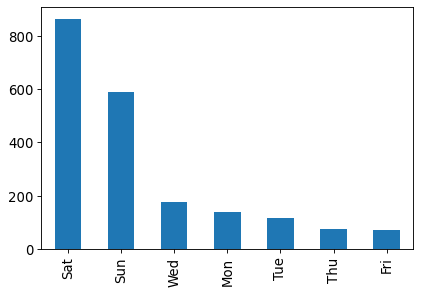

In [230]:
merged_data['Day_x'].value_counts().plot(kind='bar')

In [231]:
merged_data.dtypes

Date              datetime64[ns]
Time                      object
Comp_x                    object
Round_x                   object
Day_x                     object
Venue                     object
Result_x                  object
GF_x                     float64
GA_x                     float64
Opponent                  object
Poss                     float64
Formation                 object
Referee                   object
Match Report_x            object
team                      object
Gls                        int64
Sh                         int64
SoT                        int64
SoT%                     float64
G/Sh                     float64
G/SoT                    float64
Dist                     float64
FK                         int64
PK                         int64
PKatt                      int64
dtype: object

In [232]:
#Getting the hours values from the Time variable
merged_data['Time'] = merged_data['Time'].str.split('(').str[0]

In [233]:
# removing the spaces if there is in Time variable
merged_data['Time'] = merged_data['Time'].str.strip()

In [234]:
#Re-looking in out merged data.
merged_data.head()

Date   Time          Comp_x      Round_x Day_x Venue Result_x  GF_x  \
0 2022-08-06  17:30  Premier League  Matchweek 1   Sat  Home        L   0.0   
1 2022-08-07  14:00  Premier League  Matchweek 1   Sun  Home        L   1.0   
2 2021-08-14  15:00  Premier League  Matchweek 1   Sat  Home        W   3.0   
3 2020-09-12  12:30  Premier League  Matchweek 1   Sat  Away        W   3.0   
4 2022-08-06  15:00  Premier League  Matchweek 1   Sat  Away        L   0.0   

   GA_x     Opponent  Poss            Formation         Referee  \
0   1.0      Chelsea  38.0  2001-05-04 00:00:00    Craig Pawson   
1   2.0     Brighton  62.0  2003-04-03 00:00:00    Paul Tierney   
2   2.0  Aston Villa  38.0              4-1-4-1       Mike Dean   
3   0.0       Fulham  54.0  2003-03-04 00:00:00  Chris Kavanagh   
4   2.0  Bournemouth  65.0  2003-04-03 00:00:00    Peter Bankes   

  Match Report_x               team  Gls  Sh  SoT  SoT%  G/Sh  G/SoT  Dist  \
0   Match Report            Everton    0   8    3  37.5  0.00   0.00  13.5   
1   Match Report  Manchester United    0  17    5  29.4  0.00   0.00  15.5   
2   Match Report            Watford    3  13    7  53.8  0.23   0.43  17.9   
3   Match Report            Arsenal    3  13    5  38.5  0.23   0.60  14.1   
4   Match Report        Aston Villa    0  15    2  13.3  0.00   0.00  24.6   

   FK  PK  PKatt  
0   0   0      0  
1   0   0      0  
2   0   0      0  
3   2   0      0  
4   0   0      0

In [235]:
# encoding the Venue & Opponents
merged_data['Venue'] = merged_data['Venue'].astype('category').cat.codes

In [236]:
merged_data['Opp_code'] = merged_data['Opponent'].astype('category').cat.codes

In [237]:
# replacing time to hours 
merged_data['hour']=merged_data['Time'].str.replace(':.+',"",regex=True).astype('int')

In [250]:
merged_data.head()

Date   Time          Comp_x      Round_x Day_x  Venue Result_x  GF_x  \
0 2022-08-06  17:30  Premier League  Matchweek 1   Sat      1        L   0.0   
1 2022-08-07  14:00  Premier League  Matchweek 1   Sun      1        L   1.0   
2 2021-08-14  15:00  Premier League  Matchweek 1   Sat      1        W   3.0   
3 2020-09-12  12:30  Premier League  Matchweek 1   Sat      0        W   3.0   
4 2022-08-06  15:00  Premier League  Matchweek 1   Sat      0        L   0.0   

   GA_x     Opponent  Poss            Formation         Referee  \
0   1.0      Chelsea  38.0  2001-05-04 00:00:00    Craig Pawson   
1   2.0     Brighton  62.0  2003-04-03 00:00:00    Paul Tierney   
2   2.0  Aston Villa  38.0              4-1-4-1       Mike Dean   
3   0.0       Fulham  54.0  2003-03-04 00:00:00  Chris Kavanagh   
4   2.0  Bournemouth  65.0  2003-04-03 00:00:00    Peter Bankes   

  Match Report_x               team  Gls  Sh  SoT  SoT%  G/Sh  G/SoT  Dist  \
0   Match Report            Everton    0   8    3  37.5  0.00   0.00  13.5   
1   Match Report  Manchester United    0  17    5  29.4  0.00   0.00  15.5   
2   Match Report            Watford    3  13    7  53.8  0.23   0.43  17.9   
3   Match Report            Arsenal    3  13    5  38.5  0.23   0.60  14.1   
4   Match Report        Aston Villa    0  15    2  13.3  0.00   0.00  24.6   

   FK  PK  PKatt  Opp_code  hour  day_code  target  
0   0   0      0         6    17         5       0  
1   0   0      0         4    14         6       0  
2   0   0      0         1    15         5       1  
3   2   0      0         9    12         5       1  
4   0   0      0         2    15         5       0

In [239]:
# generating a day_code for all the days of week 
merged_data['day_code'] = merged_data['Date'].dt.dayofweek

In [248]:
#Saving the data into a csv file 
merged_data.to_csv("/Users/harshitchandrol/Documents/SEM 3/Data Quality/Project/merged_data.csv")

In [249]:
## seting our target variable 
merged_data['target'] = (merged_data['Result_x']=="W").astype('int')

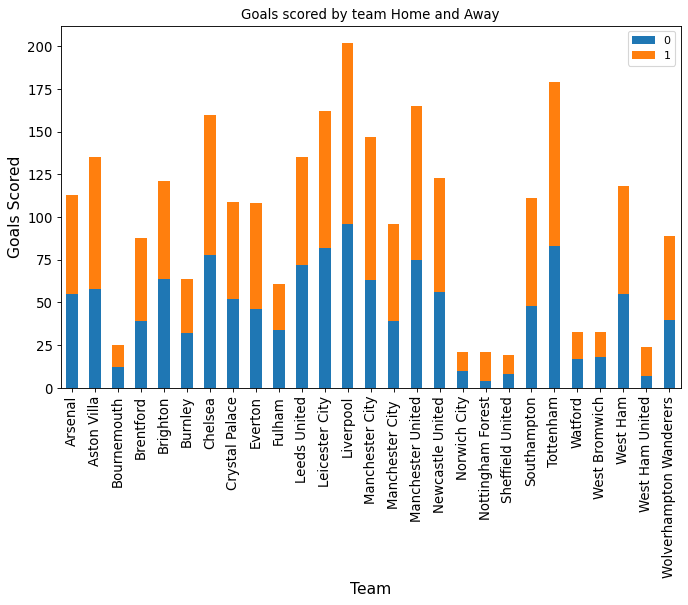

In [265]:
#EDA analysis
#1. HOme vs Away goals per team
group_home_away = merged_data.groupby(['team','Venue'])['Gls'].sum().reset_index()
pivoted_grouped_home_away = group_home_away.pivot(index='team',columns='Venue',values='Gls')
fig,axis = plt.subplots(figsize=(10,6))
pivoted_grouped_home_away.plot(kind='bar',stacked=True,ax=axis)
axis.set_title('Goals scored by team Home and Away')
axis.set_xlabel('Team')
axis.set_ylabel('Goals Scored')
axis.legend()
plt.show()


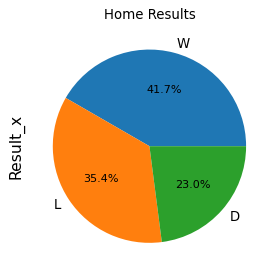

In [268]:
# 2. Home Win , Away Win , Draw pie
Venue_win = merged_data[merged_data['Venue']==1]
results_count = Venue_win['Result_x'].value_counts()
results_count.plot(kind='pie',autopct='%1.1f%%')
plt.title('Home Results')
plt.show()

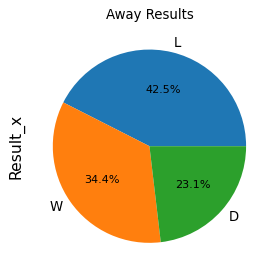

In [269]:
Venue_loss = merged_data[merged_data['Venue']==0]
results_count = Venue_loss['Result_x'].value_counts()
results_count.plot(kind='pie',autopct='%1.1f%%')
plt.title('Away Results')
plt.show()

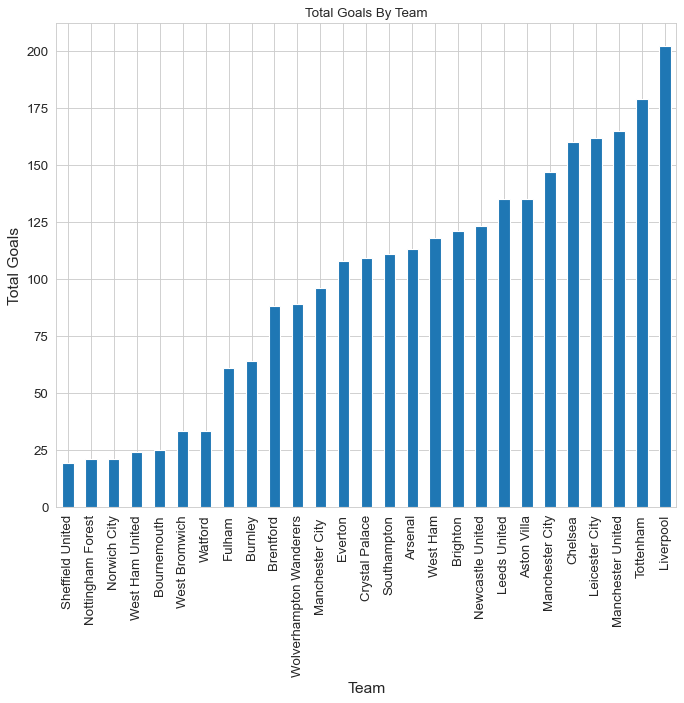

In [279]:
# 3.totals goals by team
import seaborn as sns
sns.set_style('whitegrid')
goals_by_team = merged_data.groupby('team')['Gls'].sum().sort_values()
fig,axis = plt.subplots(figsize=(10,8))
goals_by_team.plot(kind='bar',ax=axis)
axis.set_title('Total Goals By Team')
axis.set_xlabel('Team')
axis.set_ylabel('Total Goals')
plt.show()

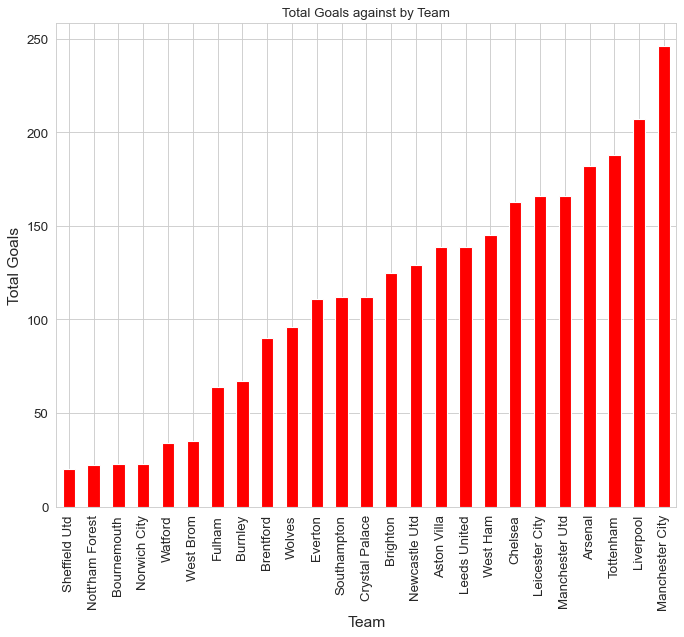

In [282]:
# 4. total goals against
goals_by_team = merged_data.groupby('Opponent')['GA_x'].sum().sort_values()
fig,axis = plt.subplots(figsize=(10,8))
goals_by_team.plot(kind='bar',ax=axis,color='red')
axis.set_title('Total Goals against by Team')
axis.set_xlabel('Team')
axis.set_ylabel('Total Goals')
plt.show()

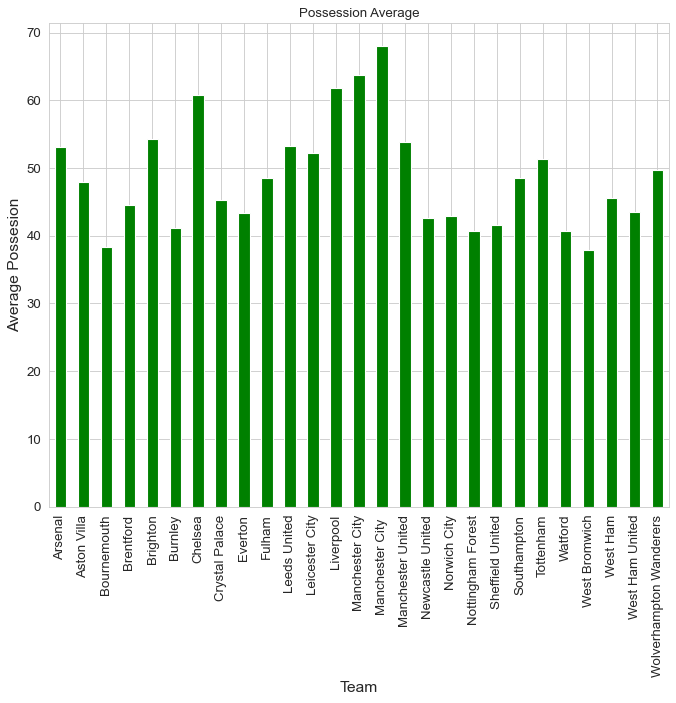

In [285]:
# 5.possesion bar 
possesion_group = merged_data.groupby(['team'])['Poss'].mean()
fig,axis = plt.subplots(figsize=(10,8))
possesion_group.plot(kind='bar',ax=axis,color='green')
axis.set_title('Possession Average')
axis.set_xlabel('Team')
axis.set_ylabel('Average Possesion')
plt.show()

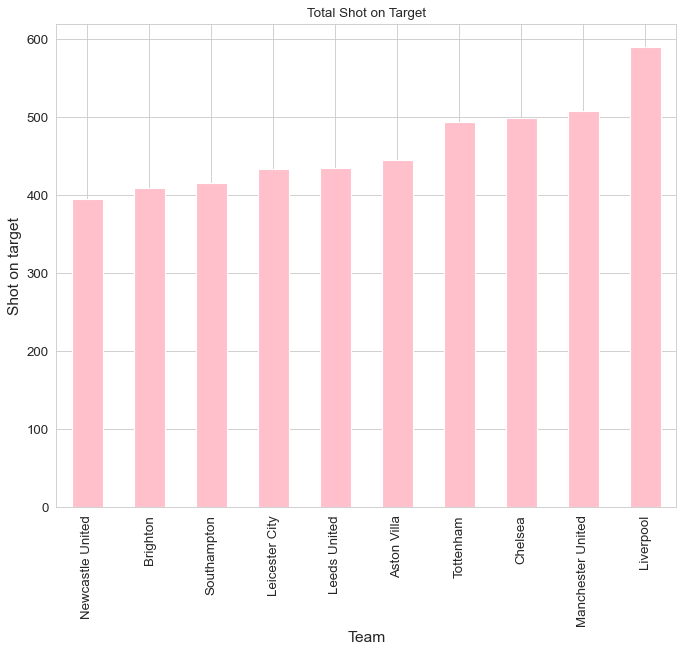

In [291]:
# 6. shots on target 
SoT_group = merged_data.groupby(['team'])['SoT'].sum().sort_values()
fig,axis = plt.subplots(figsize=(10,8))
SoT_group[17:].plot(kind='bar',ax=axis,color='pink')
axis.set_title('Total Shot on Target')
axis.set_xlabel('Team')
axis.set_ylabel('Shot on target')
plt.show()

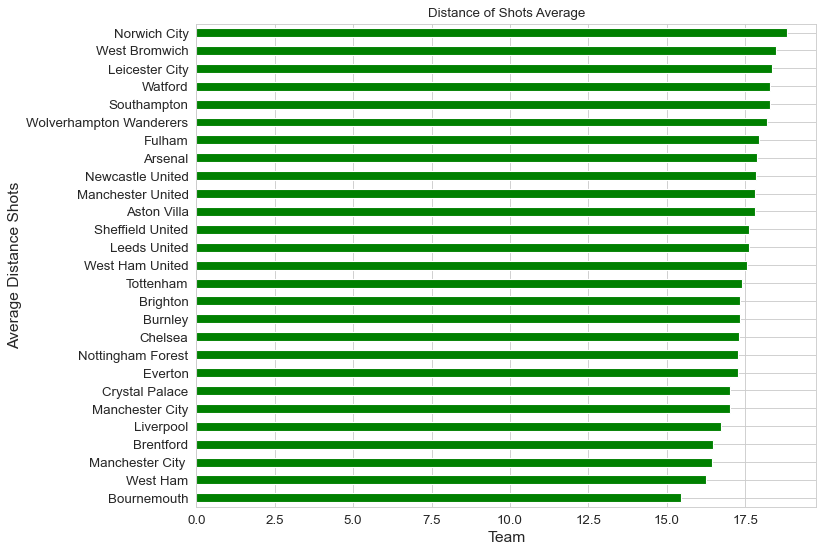

In [294]:
# 7. Best average dist shot teams
dist_group = merged_data.groupby(['team'])['Dist'].mean().sort_values()
fig,axis = plt.subplots(figsize=(10,8))
dist_group.plot(kind='barh',ax=axis,color='green')
axis.set_title('Distance of Shots Average')
axis.set_xlabel('Team')
axis.set_ylabel('Average Distance Shots')
plt.show()

In [298]:
# 8. Free kicks 
PK_grouped = merged_data.groupby(['team'])['PK','PKatt'].sum()
PK_grouped.head()

/var/folders/lq/d88dgpfd7x5dywf41x7l02dw0000gn/T/ipykernel_72511/4140285984.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  PK_grouped = merged_data.groupby(['team'])['PK','PKatt'].sum()


PK  PKatt
team                  
Arsenal      11     14
Aston Villa  11     12
Bournemouth   0      0
Brentford    12     12
Brighton     14     20

In [299]:
PK_grouped['Penalty Kicks success'] = PK_grouped['PK']/PK_grouped['PKatt'] * 100
PK_grouped.head()

PK  PKatt  Penalty Kicks success
team                                         
Arsenal      11     14              78.571429
Aston Villa  11     12              91.666667
Bournemouth   0      0                    NaN
Brentford    12     12             100.000000
Brighton     14     20              70.000000

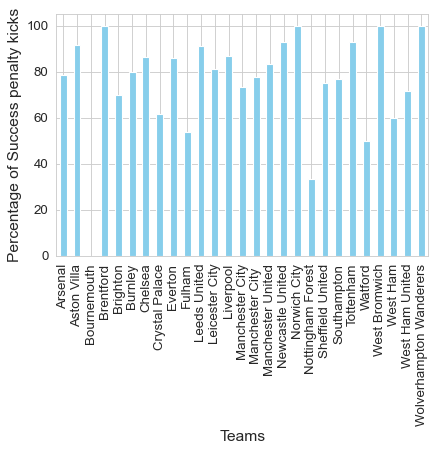

In [303]:
PK_grouped['Penalty Kicks success'].plot(kind='bar',color='skyblue')
plt.xlabel('Teams')
plt.ylabel('Percentage of Success penalty kicks')
plt.show()

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


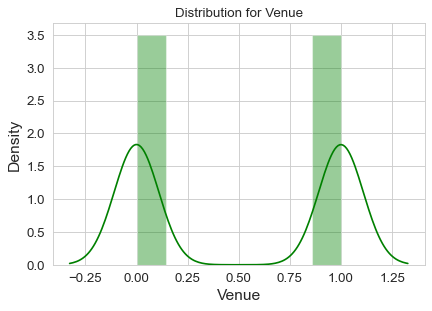

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


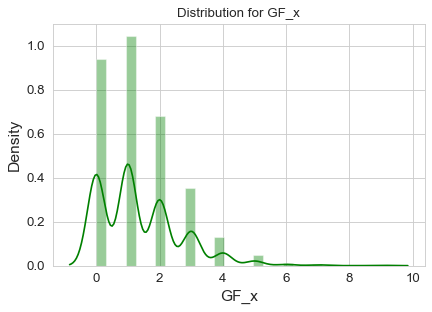

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


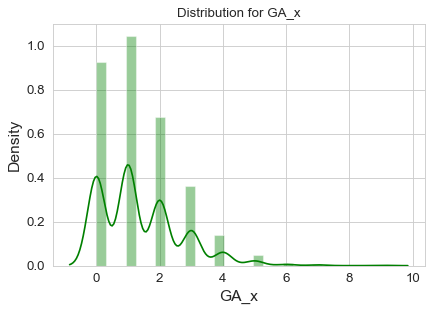

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


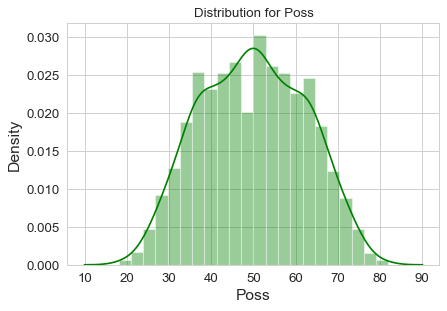

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


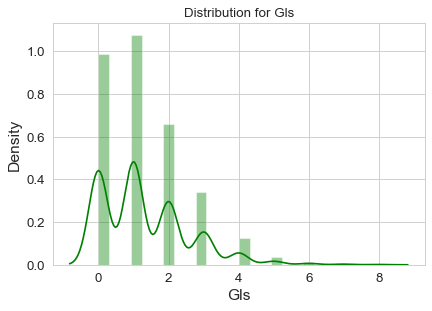

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


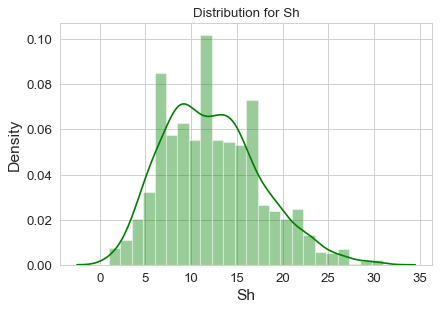

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


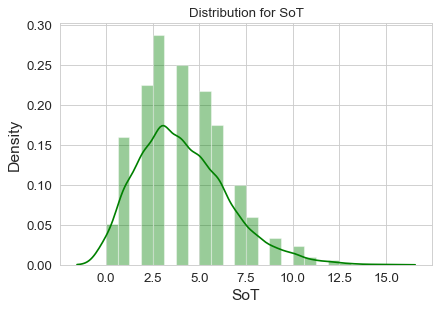

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


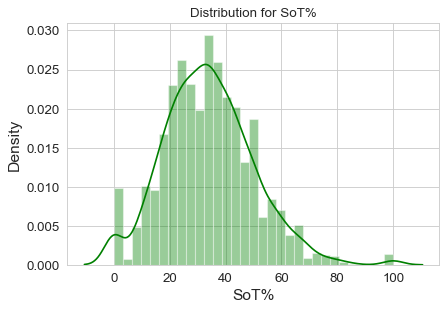

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


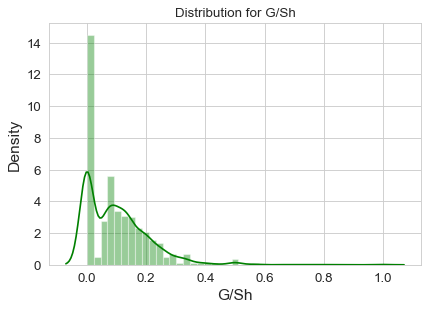

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


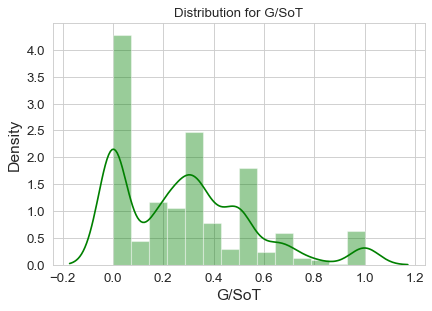

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


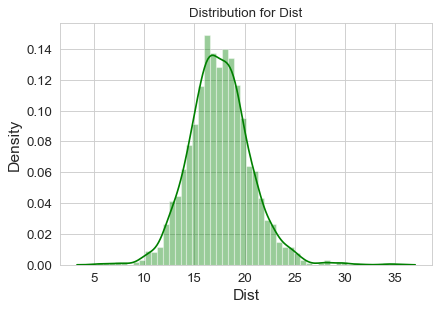

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


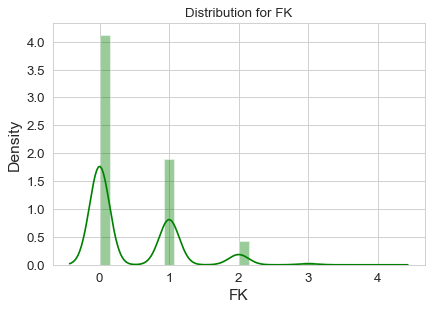

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


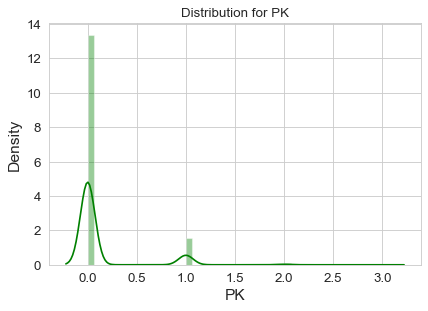

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


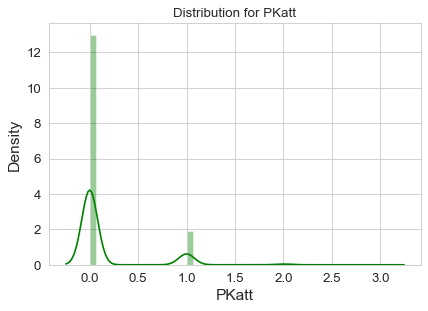

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


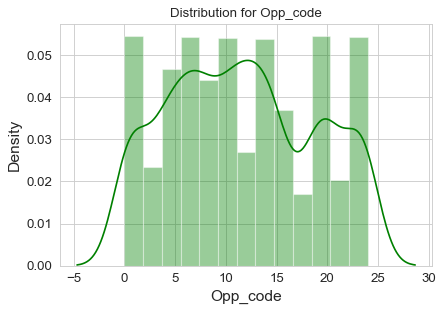

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


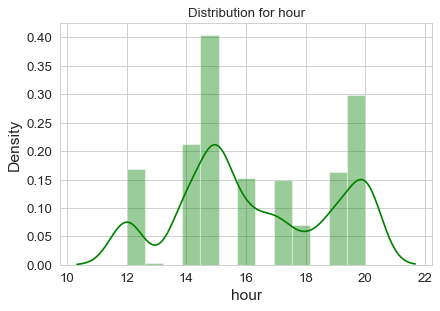

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


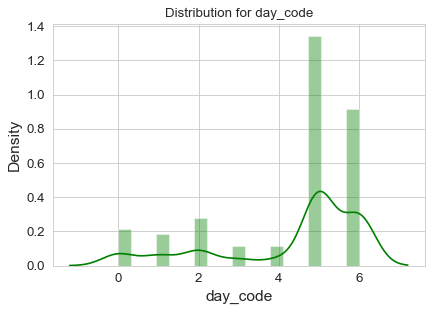

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


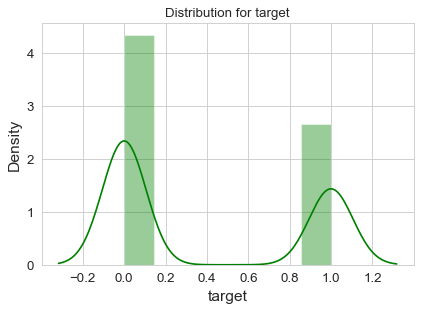

In [424]:
for cols in merged_data.select_dtypes('number').columns:
    sns.distplot(merged_data[cols],color='green')
    plt.title(f"Distribution for {cols}")
    plt.show()

In [425]:
merged_data['target'].value_counts()
# as we have less win labels information, this might affect our model performance for predicting the win probability. 

0    1259
1     772
Name: target, dtype: int64

In [304]:
# building our first ML model 
from sklearn.ensemble import RandomForestClassifier

In [306]:
# initiating the random forest classfier
rf=RandomForestClassifier(n_estimators=50,min_samples_split=10,random_state=444)

In [310]:
#Splitting the data into train and test
train_data = merged_data[merged_data['Date']<'2022-08-01']
test_data = merged_data[merged_data['Date']>'2022-08-01']

In [313]:
test_data.shape

(512, 29)

In [314]:
merged_data.head()

Date   Time          Comp_x      Round_x Day_x  Venue Result_x  GF_x  \
0 2022-08-06  17:30  Premier League  Matchweek 1   Sat      1        L   0.0   
1 2022-08-07  14:00  Premier League  Matchweek 1   Sun      1        L   1.0   
2 2021-08-14  15:00  Premier League  Matchweek 1   Sat      1        W   3.0   
3 2020-09-12  12:30  Premier League  Matchweek 1   Sat      0        W   3.0   
4 2022-08-06  15:00  Premier League  Matchweek 1   Sat      0        L   0.0   

   GA_x     Opponent  Poss            Formation         Referee  \
0   1.0      Chelsea  38.0  2001-05-04 00:00:00    Craig Pawson   
1   2.0     Brighton  62.0  2003-04-03 00:00:00    Paul Tierney   
2   2.0  Aston Villa  38.0              4-1-4-1       Mike Dean   
3   0.0       Fulham  54.0  2003-03-04 00:00:00  Chris Kavanagh   
4   2.0  Bournemouth  65.0  2003-04-03 00:00:00    Peter Bankes   

  Match Report_x               team  Gls  Sh  SoT  SoT%  G/Sh  G/SoT  Dist  \
0   Match Report            Everton    0   8    3  37.5  0.00   0.00  13.5   
1   Match Report  Manchester United    0  17    5  29.4  0.00   0.00  15.5   
2   Match Report            Watford    3  13    7  53.8  0.23   0.43  17.9   
3   Match Report            Arsenal    3  13    5  38.5  0.23   0.60  14.1   
4   Match Report        Aston Villa    0  15    2  13.3  0.00   0.00  24.6   

   FK  PK  PKatt  Opp_code  hour  day_code  target  
0   0   0      0         6    17         5       0  
1   0   0      0         4    14         6       0  
2   0   0      0         1    15         5       1  
3   2   0      0         9    12         5       1  
4   0   0      0         2    15         5       0

In [315]:
# setting out first set of predictors to start with our base algorithm 
predictors = ['Venue','Opp_code','hour','day_code']

In [317]:
# fitting the training data into our classifier
rf.fit(train_data[predictors],train_data['target'])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=444)

In [319]:
# calling predict method to predcit the outcomes on test data
preds = rf.predict(test_data[predictors])

In [321]:
# let us check the accuracy score
from sklearn.metrics import accuracy_score
acc= accuracy_score(test_data['target'],preds)

In [322]:

acc

0.6015625

as we got the accuracy of 60% using our fours predictiors, which is quite decent, however let us move a little further and try to create rolling average features which might help us to get better results.

In [323]:
# checking the confusion matrix to visualize the prediction evaluation. 
combined = pd.DataFrame(dict(actual=test_data['target'],prediction=preds))
pd.crosstab(index=combined['actual'],columns=combined['prediction'])

prediction    0   1
actual             
0           257  72
1           132  51

as we can see our model correctly predicts 257 times the lose and only 51 times the wins. and incorrectly about 204 times. let see the precision here.

In [332]:
from sklearn.metrics import precision_score
precision_score(test_data['target'],preds)

0.4146341463414634

our precision score is quite low, lets try rolling averages for few variables to increase our precision

In [368]:
# grouping out data based on the teams
grouped_matches = merged_data.groupby("team")

In [370]:
# checking for Manchester city group
group = grouped_matches.get_group("Manchester City").sort_values("Date")

In [374]:
# creating a function to group the whole merged dataset based on teams and creating a rolling average of previous 3 values in terms of few numeric coulms 
def rolling_averages(group, cols, new_cols): #function needs three arguments group : the individual team group 
    #cols: the cols which we want to get the rolling average
    #new_cols : the new rolling average cols 
    group = group.sort_values("Date") # sorting values on Date variable
    rolling_stats = group[cols].rolling(3, closed='left').mean() #this line of code take the rolling avg of previous 3 values
    group[new_cols] = rolling_stats # assigning the rolling avergaed as new_cols of the group
    group = group.dropna(subset=new_cols) # dropping the N/A values as the forst 2 roes wont have any rollign averge values
    return group # function returns the group dataframe

In [375]:
cols = ["GF_x", "GA_x", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols) # callingthe functions on Manchester City group for testing 

Date   Time          Comp_x       Round_x Day_x  Venue Result_x  \
1793 2020-10-17  17:30  Premier League   Matchweek 5   Sat      1        W   
1853 2020-10-24  12:30  Premier League   Matchweek 6   Sat      0        D   
1909 2020-10-31  12:30  Premier League   Matchweek 7   Sat      0        W   
1964 2020-11-08  16:30  Premier League   Matchweek 8   Sun      1        D   
2023 2020-11-21  17:30  Premier League   Matchweek 9   Sat      0        L   
83   2020-11-28  15:00  Premier League  Matchweek 10   Sat      1        W   
143  2020-12-05  15:00  Premier League  Matchweek 11   Sat      1        W   
203  2020-12-12  17:30  Premier League  Matchweek 12   Sat      0        D   
263  2020-12-15  20:00  Premier League  Matchweek 13   Tue      1        D   
323  2020-12-19  15:00  Premier League  Matchweek 14   Sat      0        W   
383  2020-12-26  20:00  Premier League  Matchweek 15   Sat      1        W   
503  2021-01-03  16:30  Premier League  Matchweek 17   Sun      0        W   
563  2021-01-13  18:00  Premier League  Matchweek 18   Wed      1        W   
623  2021-01-17  19:15  Premier League  Matchweek 19   Sun      1        W   
23   2021-01-20  18:00  Premier League   Matchweek 1   Wed      1        W   
743  2021-01-26  20:15  Premier League  Matchweek 20   Tue      0        W   
803  2021-01-30  15:00  Premier League  Matchweek 21   Sat      1        W   
863  2021-02-03  18:00  Premier League  Matchweek 22   Wed      0        W   
923  2021-02-07  16:30  Premier League  Matchweek 23   Sun      0        W   
983  2021-02-13  17:30  Premier League  Matchweek 24   Sat      1        W   
443  2021-02-17  20:15  Premier League  Matchweek 16   Wed      0        W   
1040 2021-02-21  16:30  Premier League  Matchweek 25   Sun      0        W   
1099 2021-02-27  12:30  Premier League  Matchweek 26   Sat      1        W   
1263 2021-03-02  20:00  Premier League  Matchweek 29   Tue      1        W   
1159 2021-03-07  16:30  Premier League  Matchweek 27   Sun      1        L   
1483 2021-03-10  18:00  Premier League  Matchweek 33   Wed      1        W   
1214 2021-03-13  20:00  Premier League  Matchweek 28   Sat      0        W   
1363 2021-04-03  17:30  Premier League  Matchweek 30   Sat      0        W   
1403 2021-04-10  12:30  Premier League  Matchweek 31   Sat      1        L   
1443 2021-04-21  20:15  Premier League  Matchweek 32   Wed      0        W   
1523 2021-05-01  12:30  Premier League  Matchweek 34   Sat      0        W   
1563 2021-05-08  17:30  Premier League  Matchweek 35   Sat      1        L   
1603 2021-05-14  20:00  Premier League  Matchweek 36   Fri      0        W   
1643 2021-05-18  19:00  Premier League  Matchweek 37   Tue      0        L   
1683 2021-05-23  16:00  Premier League  Matchweek 38   Sun      1        W   
15   2022-08-07  16:30  Premier League   Matchweek 1   Sun      0        W   
675  2022-08-13  15:00  Premier League   Matchweek 2   Sat      1        W   
1305 2022-08-21  16:30  Premier League   Matchweek 3   Sun      0        D   
1725 2022-08-27  15:00  Premier League   Matchweek 4   Sat      1        W   
1785 2022-08-31  19:30  Premier League   Matchweek 5   Wed      1        W   
1845 2022-09-03  17:30  Premier League   Matchweek 6   Sat      0        D   
1956 2022-09-17  12:30  Premier League   Matchweek 8   Sat      0        W   
2015 2022-10-02  14:00  Premier League   Matchweek 9   Sun      1        W   
75   2022-10-08  15:00  Premier League  Matchweek 10   Sat      1        W   
135  2022-10-16  16:30  Premier League  Matchweek 11   Sun      0        L   
255  2022-10-22  15:00  Premier League  Matchweek 13   Sat      1        W   
315  2022-10-29  12:30  Premier League  Matchweek 14   Sat      0        W   
375  2022-11-05  15:00  Premier League  Matchweek 15   Sat      1        W   
435  2022-11-12  12:30  Premier League  Matchweek 16   Sat      1        L   
495  2022-12-28  20:00  Premier League  Matchweek 17   Wed      0        W   
555  2022-12-31  15:00  Premier L

In [377]:
# as the function provides the desired results , applying it to the whole dataset.
matches_rolling = merged_data.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [378]:
matches_rolling

Date   Time          Comp_x       Round_x  \
team                                                                           
Arsenal                 1713 2020-10-04  14:00  Premier League   Matchweek 4   
                        1773 2020-10-17  17:30  Premier League   Matchweek 5   
                        1833 2020-10-25  19:15  Premier League   Matchweek 6   
                        1893 2020-11-01  16:30  Premier League   Matchweek 7   
                        1945 2020-11-08  19:15  Premier League   Matchweek 8   
                        2003 2020-11-22  16:30  Premier League   Matchweek 9   
                        63   2020-11-29  19:15  Premier League  Matchweek 10   
                        123  2020-12-06  16:30  Premier League  Matchweek 11   
                        183  2020-12-13  19:15  Premier League  Matchweek 12   
                        243  2020-12-16  18:00  Premier League  Matchweek 13   
                        303  2020-12-19  17:30  Premier League  Matchweek 14   
                        363  2020-12-26  17:30  Premier League  Matchweek 15   
                        423  2020-12-29  18:00  Premier League  Matchweek 16   
                        483  2021-01-02  20:00  Premier League  Matchweek 17   
                        543  2021-01-14  20:00  Premier League  Matchweek 18   
                        603  2021-01-18  20:00  Premier League  Matchweek 19   
                        723  2021-01-26  20:15  Premier League  Matchweek 20   
                        783  2021-01-30  17:30  Premier League  Matchweek 21   
                        843  2021-02-02  18:00  Premier League  Matchweek 22   
                        903  2021-02-06  12:30  Premier League  Matchweek 23   
                        963  2021-02-14  16:30  Premier League  Matchweek 24   
                        1022 2021-02-21  16:30  Premier League  Matchweek 25   
                        1079 2021-02-28  12:00  Premier League  Matchweek 26   
                        1139 2021-03-06  12:30  Premier League  Matchweek 27   
                        1198 2021-03-14  16:30  Premier League  Matchweek 28   
                        1251 2021-03-21  15:00  Premier League  Matchweek 29   
                        1351 2021-04-03  20:00  Premier League  Matchweek 30   
                        1391 2021-04-11  19:00  Premier League  Matchweek 31   
                        1431 2021-04-18  13:30  Premier League  Matchweek 32   
                        1471 2021-04-23  20:00  Premier League  Matchweek 33   
                        1511 2021-05-02  14:00  Premier League  Matchweek 34   
                        1551 2021-05-09  19:00  Premier League  Matchweek 35   
                        1591 2021-05-12  20:15  Premier League  Matchweek 36   
                        1631 2021-05-19  19:00  Premier League  Matchweek 37   
                        1671 2021-05-23  16:00  Premier League  Matchweek 38   
                        51   2021-08-13  20:00  Premier League   Matchweek 1   
                        711  2021-08-22  16:30  Premier League   Matchweek 2   
                        1341 2021-08-28  12:30  Premier League   Matchweek 3   
                        1761 2021-09-11  15:00  Premier League   Matchweek 4   
                        1821 2021-09-18  15:00  Premier League   Matchweek 5   
                        1881 2021-09-26  16:30  Premier League   Matchweek 6   
                        1935 2021-10-02  17:30  Premier League   Matchweek 7   
                        1991 2021-10-18  20:00  Premier League   Matchweek 8   
                        2051 2021-10-22  20:00  Premier League   Matchweek 9   
                        111  2021-10-30  12:30  Premier League  Matchweek 10   
                        171  2021-11-07  14:00  Premier League  Matchweek 11   
                        231  2021-11-20  17:30  Premier League  Matchweek 12   
                        291  2021-11-27  12:30  Premier League  Matchweek 13   
                        351  2021-1

In [379]:
# as the new dataframe has multi-level indexing, removing the first level of index. 
matches_rolling = matches_rolling.droplevel('team')

In [380]:
#checking the data frame again 
matches_rolling

Date   Time          Comp_x       Round_x Day_x  Venue Result_x  \
1713 2020-10-04  14:00  Premier League   Matchweek 4   Sun      1        W   
1773 2020-10-17  17:30  Premier League   Matchweek 5   Sat      0        L   
1833 2020-10-25  19:15  Premier League   Matchweek 6   Sun      1        L   
1893 2020-11-01  16:30  Premier League   Matchweek 7   Sun      0        W   
1945 2020-11-08  19:15  Premier League   Matchweek 8   Sun      1        L   
2003 2020-11-22  16:30  Premier League   Matchweek 9   Sun      0        D   
63   2020-11-29  19:15  Premier League  Matchweek 10   Sun      1        L   
123  2020-12-06  16:30  Premier League  Matchweek 11   Sun      0        L   
183  2020-12-13  19:15  Premier League  Matchweek 12   Sun      1        L   
243  2020-12-16  18:00  Premier League  Matchweek 13   Wed      1        D   
303  2020-12-19  17:30  Premier League  Matchweek 14   Sat      0        L   
363  2020-12-26  17:30  Premier League  Matchweek 15   Sat      1        W   
423  2020-12-29  18:00  Premier League  Matchweek 16   Tue      0        W   
483  2021-01-02  20:00  Premier League  Matchweek 17   Sat      0        W   
543  2021-01-14  20:00  Premier League  Matchweek 18   Thu      1        D   
603  2021-01-18  20:00  Premier League  Matchweek 19   Mon      1        W   
723  2021-01-26  20:15  Premier League  Matchweek 20   Tue      0        W   
783  2021-01-30  17:30  Premier League  Matchweek 21   Sat      1        D   
843  2021-02-02  18:00  Premier League  Matchweek 22   Tue      0        L   
903  2021-02-06  12:30  Premier League  Matchweek 23   Sat      0        L   
963  2021-02-14  16:30  Premier League  Matchweek 24   Sun      1        W   
1022 2021-02-21  16:30  Premier League  Matchweek 25   Sun      1        L   
1079 2021-02-28  12:00  Premier League  Matchweek 26   Sun      0        W   
1139 2021-03-06  12:30  Premier League  Matchweek 27   Sat      0        D   
1198 2021-03-14  16:30  Premier League  Matchweek 28   Sun      1        W   
1251 2021-03-21  15:00  Premier League  Matchweek 29   Sun      0        D   
1351 2021-04-03  20:00  Premier League  Matchweek 30   Sat      1        L   
1391 2021-04-11  19:00  Premier League  Matchweek 31   Sun      0        W   
1431 2021-04-18  13:30  Premier League  Matchweek 32   Sun      1        D   
1471 2021-04-23  20:00  Premier League  Matchweek 33   Fri      1        L   
1511 2021-05-02  14:00  Premier League  Matchweek 34   Sun      0        W   
1551 2021-05-09  19:00  Premier League  Matchweek 35   Sun      1        W   
1591 2021-05-12  20:15  Premier League  Matchweek 36   Wed      0        W   
1631 2021-05-19  19:00  Premier League  Matchweek 37   Wed      0        W   
1671 2021-05-23  16:00  Premier League  Matchweek 38   Sun      1        W   
51   2021-08-13  20:00  Premier League   Matchweek 1   Fri      0        L   
711  2021-08-22  16:30  Premier League   Matchweek 2   Sun      1        L   
1341 2021-08-28  12:30  Premier League   Matchweek 3   Sat      0        L   
1761 2021-09-11  15:00  Premier League   Matchweek 4   Sat      1        W   
1821 2021-09-18  15:00  Premier League   Matchweek 5   Sat      0        W   
1881 2021-09-26  16:30  Premier League   Matchweek 6   Sun      1        W   
1935 2021-10-02  17:30  Premier League   Matchweek 7   Sat      0        D   
1991 2021-10-18  20:00  Premier League   Matchweek 8   Mon      1        D   
2051 2021-10-22  20:00  Premier League   Matchweek 9   Fri      1        W   
111  2021-10-30  12:30  Premier League  Matchweek 10   Sat      0        W   
171  2021-11-07  14:00  Premier League  Matchweek 11   Sun      1        W   
231  2021-11-20  17:30  Premier League  Matchweek 12   Sat      0        L   
291  2021-11-27  12:30  Premier League  Matchweek 13   Sat      1        W   
351  2021-12-02  20:15  Premier League  Matchweek 14   Thu      0        L   
411  2021-12-06  20:00  Premier League  Matchweek 15   Mon      0        L   
471  2021-12-11  15:00  Premier L

In [390]:
matches_rolling.index = range(matches_rolling.shape[0])

In [391]:
# now try Support Vector Machine Classifier for prediction 
from sklearn.svm import SVC
svc=SVC(kernel='rbf',random_state=444)

In [465]:
# creating a function for algorithm execution
def make_predictions(data, predictors):
    train = data[data["Date"] < '2021-12-01']
    test = data[data["Date"] > '2021-12-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, error

In [466]:
predictors_new = predictors+new_cols
predictors_new

['Venue',
 'Opp_code',
 'hour',
 'day_code',
 'GF_x_rolling',
 'GA_x_rolling',
 'Sh_rolling',
 'SoT_rolling',
 'Dist_rolling',
 'FK_rolling',
 'PK_rolling',
 'PKatt_rolling']

In [467]:
combined, error= make_predictions(matches_rolling,predictors_new)

In [468]:
error

0.5055555555555555

In [479]:
from xgboost import XGBClassifier

In [489]:
xgb = XGBClassifier(seed=100)
predictors_new = predictors+new_cols
train = matches_rolling[matches_rolling["Date"] < '2021-12-01']
test = matches_rolling[matches_rolling["Date"] > '2021-12-01']
xgb.fit(train[predictors_new],train['target'])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [490]:
preds_xgb = xgb.predict(test[predictors_new])

In [491]:
error_xgb = precision_score(test['target'],preds_xgb)

In [492]:
error_xgb

0.503448275862069

In [493]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['target'], preds_xgb)

<AxesSubplot:>

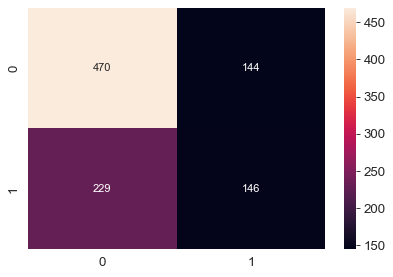

In [494]:
sns.heatmap(cm, annot=True,fmt='d')

In [495]:
from sklearn.metrics import classification_report
print(classification_report(test['target'], preds_xgb))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       614
           1       0.50      0.39      0.44       375

    accuracy                           0.62       989
   macro avg       0.59      0.58      0.58       989
weighted avg       0.61      0.62      0.61       989



In [472]:
# lets create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# starting with the Random Forest Classifier pipeline but we will modify this later with the parameter grid
pipe = Pipeline([
        ("prep", None),
        ("clf", DummyClassifier())
    ])

# define the parameter grid so that we can change the preprocessor and classifier as well as their hyperparameters.
# The syntax to define a parameter grid for a pipeline is to specify for each parameter the step name, 
# followed by __ (a double underscore), followed by the parameter name. 
param_grid = [
    {'clf': [SVC()],
     'clf__kernel':['rbf', 'linear'],
     'clf__C': [0.01, 0.1, 1, 10, 100],
     'clf__gamma': [0.01, 0.1, 1, 10, 100]
    },
    {'clf': [LogisticRegression(max_iter=100000)],
     'clf__C': [0.01, 0.1, 1, 10, 100]
    },
    {'clf': [RandomForestClassifier()],
     'clf__max_features': ['auto', 'sqrt', 'log2'],
     'clf__n_estimators': [100, 200, 300],
     'clf__max_depth': [3, 5, 7, None],
    },
    {'clf': [GradientBoostingClassifier()],
     'clf__max_features': ['auto', 'sqrt', 'log2'],
     'clf__n_estimators': [100, 200, 300],
     'clf__max_depth': [3, 5, 7, None],
    }]

In [496]:
#Perform Model Selection with Data Preprocessing and Grid-Search Cross-Validation
from sklearn.model_selection import GridSearchCV

# using multiple metrics for reporting cross-validation scores
scoring = {'accuracy': 'accuracy', 'precision (macro)': 'precision_macro', 
           'recall (macro)': 'recall_macro', 'f1 (macro)': 'f1_macro', 'AUC': 'roc_auc'}

grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3,
                    scoring=scoring, refit='accuracy',
                    return_train_score=True, 
                    n_jobs=-1, verbose=1)

In [497]:
grid.fit(train[predictors_new],train['target'])

Fitting 3 folds for each of 127 candidates, totalling 381 fits


/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/a

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/a

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/a

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/a

/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harshitchandrol/opt/a

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep', None),
                                       ('clf', DummyClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf': [SVC()], 'clf__C': [0.01, 0.1, 1, 10, 100],
                          'clf__gamma': [0.01, 0.1, 1, 10, 100],
                          'clf__kernel': ['rbf', 'linear']},
                         {'clf': [LogisticRegression(max_iter=100000)],
                          'clf__C': [0.01, 0.1, 1, 10, 100]},
                         {'clf': [RandomForestClassifier(max_depth=5,
                                                         max_features='s...
                          'clf__n_estimators': [100, 200, 300]},
                         {'clf': [GradientBoostingClassifier()],
                          'clf__max_depth': [3, 5, 7, None],
                          'clf__max_features': ['auto', 'sqrt', 'log2'],
                          'clf__n_estimators': [100, 200, 300]}],
             refit='

In [499]:
print("Best cross-validation score accuracy): {:.3f}".format(grid.best_score_))

Best cross-validation score accuracy): 0.624


In [500]:
print("\n".join("{}:{}\n".format(k, v) for k, v in grid.best_params_.items()))

clf:RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=200)

clf__max_depth:5

clf__max_features:sqrt

clf__n_estimators:200



In [501]:
grid.best_score_

0.6238236899200043

# As performing rolling avergaes did not increased the accuracy by much level, but still this is quite a decent score for our intitial iterations. to improve the results we might increase the dataset for more seasons and include other features. 